# Data Science Base Line Code

### Import

In [8]:
#Import문 - Import 추가로 할게 있다면 여기다가 해주세요
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


### 함수선언은 여기에 해주면 됨

In [9]:
#인코딩 / 라벨링함수
def encode_and_transform_dates(df):
    # 1. 라벨 인코딩할 열들 지정
    label_cols = ['Card Brand', 'Card Type', 'Error Message', 'Is Fraud?']
    
    # 2. 각 열에 대해 라벨 인코딩 수행
    label_encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # 나중에 필요하면 인코더 저장 (복원할 때 사용 가능)
    
    # 3. 날짜 데이터를 8자리 숫자로 변환
    # 'Expires' 변환 (MM/YYYY -> YYYYMMDD)
    df['Expires'] = df['Expires'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')
    
    # 'Acct Open Date' 변환 (MM/YYYY -> YYYYMMDD)
    df['Acct Open Date'] = df['Acct Open Date'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')
    
    # 날짜 형식을 int 타입으로 변환
    df['Expires'] = df['Expires'].astype(int)
    df['Acct Open Date'] = df['Acct Open Date'].astype(int)
    
    # 인코딩된 데이터프레임 반환
    return df
#Is Fraud : Yes-1, No-0으로 Labeled


In [10]:
#Correlation Matrix 출력함수
def correlation_write(df, path='datas/파생/correlation_matrix.csv'):
    # 상관관계 계산
    correlation_matrix = df.corr()
    
    # 상관관계 결과를 CSV로 저장
    correlation_matrix.to_csv(path)
    
    # 히트맵 그리기
    plt.figure(figsize=(10, 8)) 
    plt.title("Correlation Heatmap", fontsize=16)
    
    # Seaborn 히트맵 사용 (각 칸에 상관계수 표시)
    sns.heatmap(
        correlation_matrix, 
        annot=True,          # 상관계수 표시
        cmap='coolwarm', 
        linewidths=0.5, 
        fmt=".2f",           # 소수점 둘째 자리까지 표시
        annot_kws={"size": 10} # 상관계수 숫자의 글꼴 크기 지정
    )

    plt.tight_layout()
    plt.show()

In [11]:
# Classification Report, Confusion Matrix 출력함수
def print_classification_report_and_confusion_matrix(model, X_test, y_test):
    # 예측값 생성
    y_pred = model.predict(X_test)
    
    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # 분류 리포트 출력 (Precision, Recall, F1-score 등)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix 출력
    cm = confusion_matrix(y_test, y_pred)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    matrix.plot(cmap='coolwarm')
    for text in matrix.text_.ravel():
        text.set_color("black")
    plt.grid(False)
    plt.show()


---
---
---  

### 여기서부터가 찐구현
#### 데이터 불러오기

Index(['User', 'Gender', 'Current Age', 'Retirement Age', 'Birth Year',
       'Birth Month', 'Zipcode', 'Per Capita Income - Zipcode',
       'Yearly Income', 'Total Debt', 'Credit Score', 'Year', 'Month', 'Day',
       'Merchandise Code', 'Card', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'Has Chip', 'Credit Limit', 'Acct Open Date',
       'Year PIN last Changed', 'Amount', 'Whether Security Chip is Used',
       'Error Message', 'Is Fraud?'],
      dtype='object')


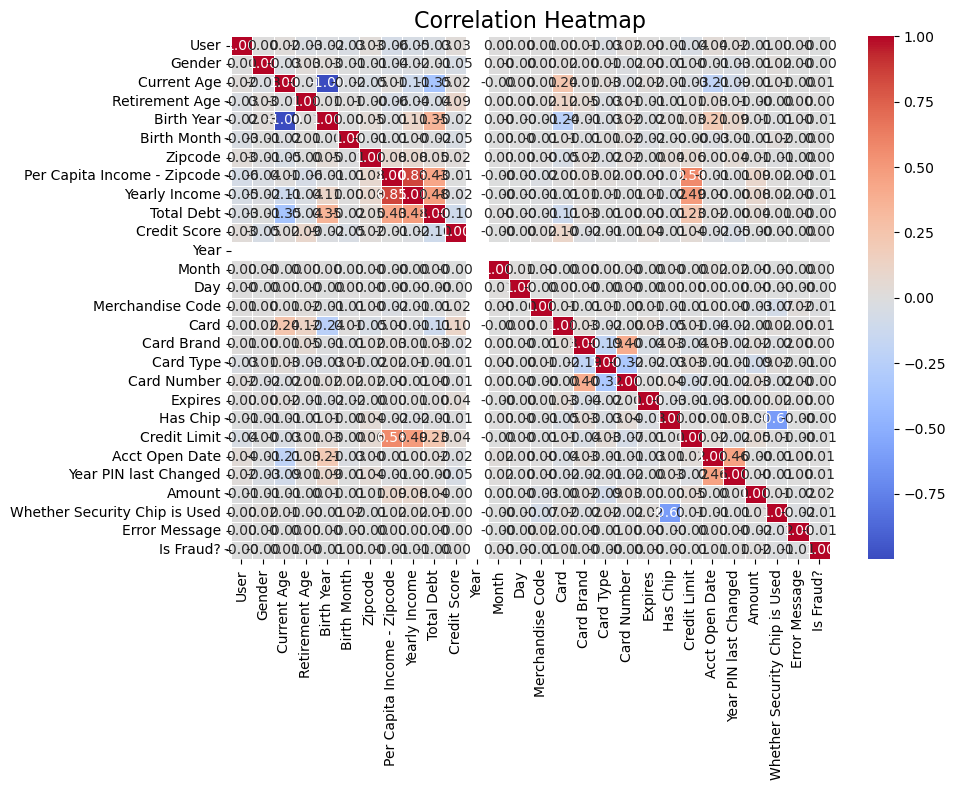

In [12]:
train_data = pd.read_csv('datas/train.csv')
encode_and_transform_dates(train_data)
print(train_data.columns)
correlation_write(train_data)

#### Train / Test Dataset 분리하기

In [13]:
X = train_data.drop(columns=['Is Fraud?'])
y = train_data['Is Fraud?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

class_weight ='balanced'

Accuracy: 0.9986

Classification Report:


c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492727
           1       0.00      0.00      0.00       704

    accuracy                           1.00    493431
   macro avg       0.50      0.50      0.50    493431
weighted avg       1.00      1.00      1.00    493431



c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


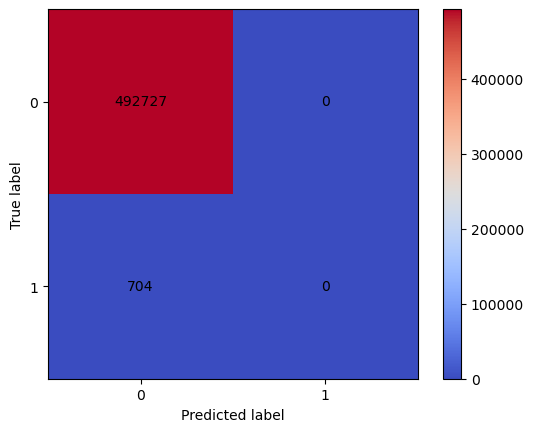

In [14]:
model = LogisticRegression(penalty='l2',fit_intercept=False,class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

print_classification_report_and_confusion_matrix(model, X_test, y_test)

### Balanced Random Forest

마찬가지로 아래의 class_weight='balanced'를 통해 구현

In [15]:
rf=RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train,y_train)
print_classification_report_and_confusion_matrix(rf, X_test, y_test)

KeyboardInterrupt: 

Random Forest는 자체적으로 Feature Importance를 추출할 수 있음 - 이에 대한 코드

In [ ]:
#Random Forest 결과물 -> Feature Importance 추출

importances = rf.feature_importances_
# 특성 이름과 중요도를 함께 보기 (X_train이 DataFrame일 때)
feature_names = X_train.columns  # X_train이 Pandas DataFrame일 때
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 중요도가 높은 순서대로 정렬
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

#### SVM(Support Vector Machine)

In [ ]:
scaler = StandardScaler()
svm = make_pipeline(StandardScaler(),LinearSVC(penalty='l1',class_weight='balanced'))
svm.fit(X_train,y_train)
print_classification_report_and_confusion_matrix(svm, X_test, y_test)